In [6]:
import pandas as pd
import numpy as np
import quandl
import math
import sklearn
from sklearn import preprocessing,svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from statistics import mean
import random 
from sklearn import neighbors
from collections import Counter
import warnings

In [5]:
df=pd.read_csv('S.csv')
df.set_index('Date',inplace=True)
df['HL_PCT']=(df['High']-df['Adj Close'])/df['Adj Close']*100.0
df['PCT_change']=(df['Adj Close']-df['Open'])/df['Open']*100.0
df=df[['Adj Close','HL_PCT','PCT_change']]
forcast='Adj Close'
df.fillna(-99,inplace=True)
forcastout=int(math.ceil(0.1*len(df)))#rounds up to integer value
df['label']=df[forcast].shift(-forcastout)


X=np.array(df.drop(['label'],1))#drop will return a new dataframe
#feature will be captal X, label will be lower case y
X=X[:-forcastout]#X is the first 90% of the data
X=preprocessing.scale(X)
X_lat=X[-forcastout:]#last 10% of the 90% 

df.dropna(inplace=True)

y=np.array(df['label'])
y=np.array(df['label'])
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.01)


clf=LinearRegression()



clf.fit(X_train,y_train)
with open('linearregression.pickle','wb')as f:
    pickle.dump(clf,f)#dump the classifer
pickle_in = open('linearregression.pickle','rb')
clf=pickle.load(pickle_in)


accuracy=clf.score(X_test,y_test)
#display(accuracy,forcastout)
forcast_set=clf.predict(X_lat)
style.use=('ggplot')


df['Forcast']=np.nan
last_date=df.iloc[-1].name
dt=datetime.datetime.strptime(last_date, '%Y-%m-%d')
last_unix=dt.timestamp()
one_day=86400#how many seconds per day
next_unix=last_unix+one_day

for i in forcast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj Close'].plot()
df['Forcast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
print('accuracy: ',accuracy)
plt.savefig('stock.jpg',dpi=1600)

NameError: name 'pickle' is not defined

0.5015615383054526


<function matplotlib.pyplot.show(*args, **kw)>

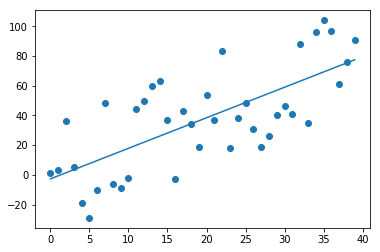

In [29]:
#xs=np.array([1,2,3,4,5,6],dtype=np.float64)
#ys=np.array([5,4,6,5,6,7],dtype=np.float64)
plt.show()
def create(hm,variance,step=3,correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val+=step
        elif correlation and correlation =='neg':
            val-=step
        xs=[i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64), np.array(ys,dtype=np.float64)
xs,ys=create(40,40,2,correlation='pos')
def best_fits(xs,ys):
    m=((mean(xs)*mean(ys))-(mean(xs*ys)))/((mean(xs)**2-mean(xs**2)))
    return m
m=best_fits(xs,ys)
def intercept(xs,ys,m):
    b=mean(ys)-m*mean(xs)
    return b
b=intercept(xs,ys,m)

def se(yso,ysl):
    return sum((ysl-yso)**2)
def coefficientDeter(yso,ysl):
    ymean=[mean(yso) for y in yso]
    squareError=se(yso,ysl)
    squaredErrorMean=se(yso,ymean)
    return 1-(squareError/squaredErrorMean)

regression=[(m*x)+b for x in xs]
es=coefficientDeter(ys,regression)
print(es)
plt.scatter(xs,ys)
plt.plot(xs,regression)
plt.show

0.9494111148290778


<function matplotlib.pyplot.show(*args, **kw)>

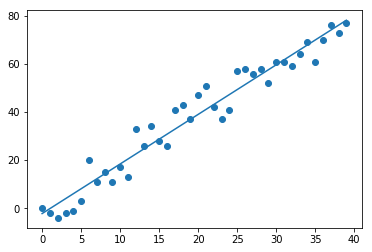

In [32]:
def create(hm,variance,step=3,correlation=False):
    val=1
    ys=[]
    for i in range(hm):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val+=step
        elif correlation and correlation =='neg':
            val-=step
        xs=[i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64), np.array(ys,dtype=np.float64)
xs,ys=create(40,10,2,correlation='pos')
def best_fits(xs,ys):
    m=((mean(xs)*mean(ys))-(mean(xs*ys)))/((mean(xs)**2-mean(xs**2)))
    return m
m=best_fits(xs,ys)
def intercept(xs,ys,m):
    b=mean(ys)-m*mean(xs)
    return b
b=intercept(xs,ys,m)

def se(yso,ysl):
    return sum((ysl-yso)**2)
def coefficientDeter(yso,ysl):
    ymean=[mean(yso) for y in yso]
    squareError=se(yso,ysl)
    squaredErrorMean=se(yso,ymean)
    return 1-(squareError/squaredErrorMean)

regression=[(m*x)+b for x in xs]
es=coefficientDeter(ys,regression)
print(es)
plt.scatter(xs,ys)
plt.plot(xs,regression)
plt.show

In [88]:
#classification 
accuracy1=[]
k=50
for i in range(k):
    df=pd.read_csv('dataR2.csv')
    df.drop(['Age'],1,inplace=True)
    full_data=df.astype(float).values.tolist()
    random.shuffle(full_data)
    test_size=0.7
    train_set={1:[],2:[]}
    test_set={1:[],2:[]}
    train_data=full_data[:-int(test_size*len(full_data))]#create the index value and slice that 
    test_data=full_data[-int(test_size*len(full_data)):]#Test data will be last 20%
    for i in train_data:
        train_set[i[-1]].append(i[:-1])#last column either 1, or 2
    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    def k_nearest_n(data,predict,k):
        if len(data)>=k:
            warnings.warn('K is not a good value')
        distances=[]
        for group in  data:
            for features in data[group]:
                eculidean=np.linalg.norm(np.array(features)-np.array(predict))
                distances.append([eculidean,group])
        votes=[i[1] for i in sorted(distances)[:k]]
        vote_result=Counter(votes).most_common(1)[0][0]
        confidence=Counter(votes).most_common(1)[0][1]/k
        return vote_result,confidence
    correct=0
    total=0
    for group in test_set:
        for data in test_set[group]:
            votes,con=k_nearest_n(train_set,data,k=5)
            if group==votes:
                correct+=1
            total+=1
    accuracy=correct/total
    accuracy1.append(accuracy)
print('The accuracy of {} times is:'.format(k),sum(accuracies)/len(accuracies)*100.0,'%')

The accuracy of 50 times is: 48.9268292682927 %


In [8]:
accuracies=[]
k=50
for i in range(k):
    df=pd.read_csv('dataR2.csv')
    #df.drop(['Age'],1,inplace=True)
    X=np.array(df.drop(['Classification'],1))
    y=np.array(df['Classification'])

    X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.7)

    clf=svm.SVC()
    clf.fit(X_train, y_train)

    accuracy=clf.score(X_test,y_test)
    accuracies.append(accuracy)

print('The accuracy of {} times is:'.format(k),sum(accuracies)/len(accuracies)*100.0,'%')

C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

The accuracy of 50 times is: 52.04878048780489 %


C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

In [31]:
p1=[1,4]
p2=[4,7]
euclideam=math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
euclideam

4.242640687119285

C:\Users\ROG\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: K is not a good value


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

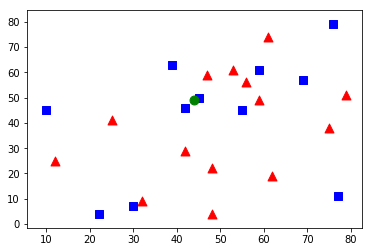

In [27]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
# Feature set containing (x,y) values of 25 known/training data 
trainData = np.random.randint(0,80,(25,2)).astype(np.float32)
z=np.vectorize(trainData)
# Labels each one either Red or Blue with numbers 0 and 1 
responses = np.random.randint(0,2,(25,1)).astype(np.float32)
h=np.vectorize(responses)
# Take Red families and plot them 
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# Take Blue families and plot them 
blue = trainData[responses.ravel()==1] 
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32) 
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
new=[25,60]
dataset={'red':red,'blue':blue}
knn = cv2.ml.KNearest_create()
knn.train(trainData,cv2.ml.ROW_SAMPLE,responses)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

def k_nearest_n(data,predict,k=100):
    if len(data)>=k:
        warnings.warn('K is not a good value')
    distances=[]
    for group in  data:
        for features in data[group]:
            eculidean=np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([eculidean,group])
    votes=[i[1] for i in sorted(distances)[:k]]
    print(Counter(votes).most_common(1))
    vote_result=Counter(votes).most_common(1)[0][0]
    return vote_result
k_nearest_n(whole,new,k=3)

In [18]:
distances=[1,4,5,6,7,8,99,0,7,88,95]
k=3
votes=i+=1 for i in (distances)
display(votes)

SyntaxError: invalid syntax (<ipython-input-18-09e521f800bd>, line 3)

In [ ]:
class SVM:
    def __init__(self,visulaization=True):
        self.visualization=visualization
        self.color={1:'r',-1:'b'}
        if self.visulaization:
            self.fig=plt.figure()
            self.ax=self.fig.add_subplot(1,1,1)
    def fit(self,data):
        pass
    def predict(self.data):
        classification=np.sign(np.dot(np.array(features),self.w)+self.b)
data_dict={-1:np.array([[1,7],[2,8],[3,9]]),1:np.array([[6,1],[5,2],[3,4]])}